# STOR601 Programming assessment 2 - C++

## Part 1.

Below, we have an example of some C++ code. We are particularly interested in the purpose of the anon member function within the line segment class.

In [1]:
#include <iostream>

In [2]:
struct Point
{
    double x;
    double y;
    Point(double _x = 0.0, double _y = 0.0)
    {
        x = _x;
        y = _y;   
    }
    Point operator-(Point p)
    {
       return Point(x - p.x,y - p.y);
    }
};

struct Line_Segment
{
    Point a;
    Point b;
    Line_Segment(Point _a, Point _b)
    {
        a = _a;
        b = _b;
    }
    double anon(Line_Segment other)
    {
        Point c = b - a;
        Point d = other.b - other.a;
        return c.x * d.y - d.x*c.y;
    }
};

In order to determine the function's purpose we can test it out. We can see that it is an operation that can be applied between 2 line segments, therefore, we can create a number of test cases, using different line segments to see how the function behaves.

### Test case 1

In [3]:
// test case: 1 - both line segments are the same, length sqrt(2)
// creating 2 points p1, p2

Point p1(1,2);
Point p2(2,1);

// creating line segment

Line_Segment l1(p1, p2);

// creating 2nd line segment

Point p3(1,2);
Point p4(2,1);
Line_Segment l2(p3, p4);

l1.anon(l2)

(double) 0.0000000


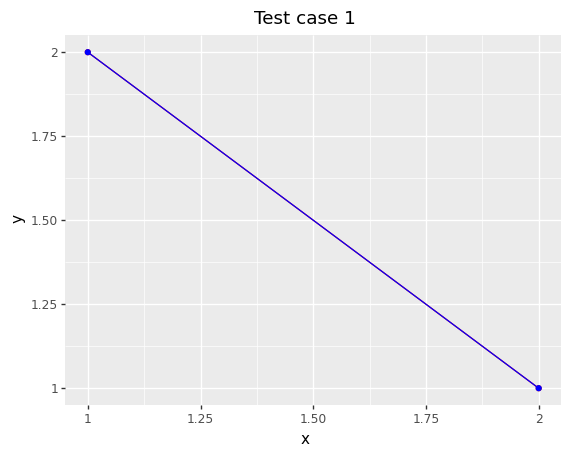

### Test case 2

In [4]:
// test case: 2 - line segments that form a straight line (angle 180), length sqrt(2)
// creating 2 points p5, p6

Point p5(1,1);
Point p6(2,2);

// creating line segment

Line_Segment l3(p5, p6);

// creating 2nd line segment

Point p7(1,1);
Point p8(0,0);
Line_Segment l4(p7, p8);

l3.anon(l4)

(double) 0.0000000


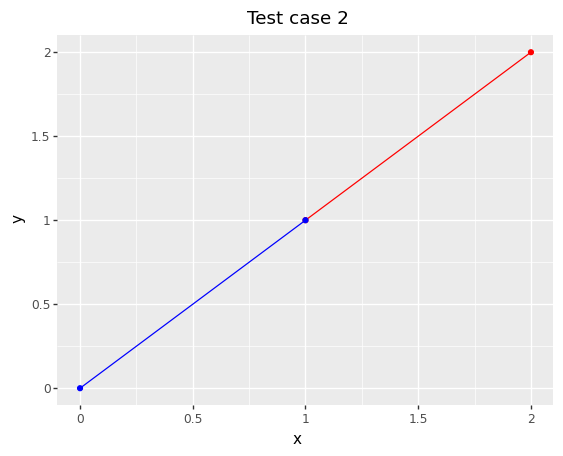

### Test case 3

In [5]:
// test case: 3 - line segments at 90 degrees, length sqrt(2)
// creating 2 points p9, p10

Point p9(0,1.5);
Point p10(1,2.5);

// creating line segment

Line_Segment l5(p9, p10);

// creating 2nd line segment

Point p11(1,1);
Point p12(0,2);
Line_Segment l6(p11, p12);

l5.anon(l6)

(double) 2.0000000


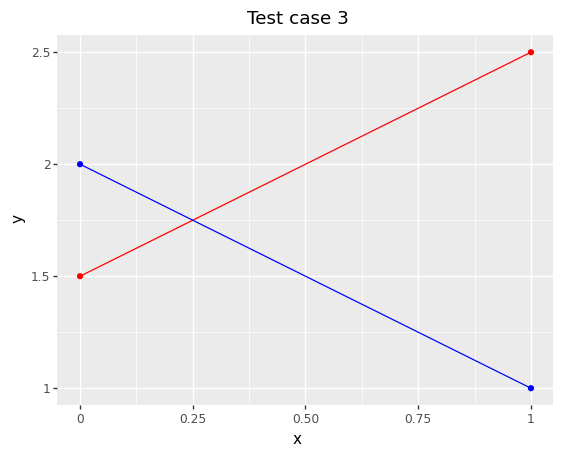

### Test case 4

In [6]:
// test case: 4 - line segments don't intersect
// creating 2 points p13, p14

Point p13(1,1);
Point p14(2,2);

// creating line segment

Line_Segment l7(p13, p14);

// creating 2nd line segment

Point p15(-1,1);
Point p16(0,0);
Line_Segment l8(p15, p16);

l7.anon(l8)

(double) -2.0000000


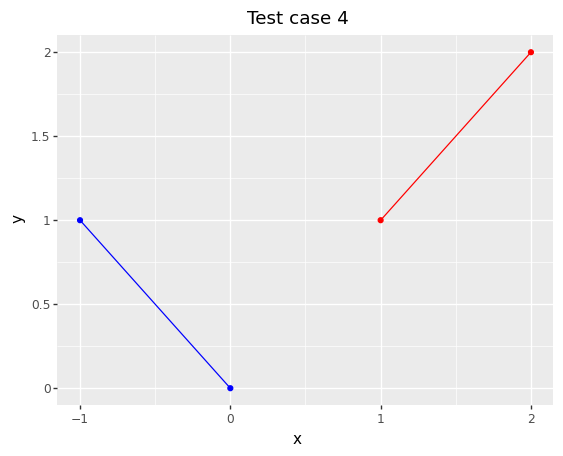

In each case, it is clear to see that the anon function is calculating the cross product of the two vectors that represent the line segments. The formula for the cross product is given by $|a||b|\sin(\theta)$, where $|a|, |b|$ represent the length of vectors $a$ and $b$ respectively and $\sin(\theta)$ gives the angle between the two vectors. In order to calculate the cross product of two vectors, they must share an endpoint - this characteristic is explored in some of the test cases that are considered. 

If we first consider a pair of line segments that share a point, we can consider some specific test scenarios that we can compare to known solutions. Firstly, when $\sin(\theta) = 0$, we expect to see that the cross product is also 0. In the 1st and 2nd test cases, the angle between the vectors was $0^o$ and $180^o$, hence we obtained a cross product of 0 - as is expected. 

As we have seen above, the formula for the cross product uses both the magnitudes of the vectors and the angle between them. The 3rd and 4th test cases were to determine how the function deals with vectors that don't share a single point a the end of each line segment.

In the 3rd test case, we consider when the two lines intersect. Implementing the function, we see that we obtain an output value of 2. In this scenario, we see that the function is caclulating the cross product between the two vectors as if the end points were shared: ($\sqrt{2})^2sin(90) = 2$. Similar behaviour is observed when we consider two line segments that don't intersect (test case 4). We note that it takes the direction of the line segment into account, hence obtaining the cross product ($\sqrt{2})^2sin(270) = -2$.

Therefore, we deduce that the function $\texttt{anon}$ takes two line segments, displaces them such that they share an end point - treating them as 2-D vectors. It then calculates the cross product of these two vectors, in the 2-D plane and outputs the solution.

## Part 2.

We wish to develop an algorithm to determine if two line segments in the same plane intersect. The proposed algorithm works by considering the orientation (clockwise, anticlockwise, colinear) of the endpoints of the two line segments, and comparing these orientations to determine if the two line segments intersect.

Given three points $A,B,C$, with co-ordinates $(x_A, y_A), (x_B, y_B), (x_C, y_C)$ respectively, we obtain their orientation by calculating: 
$$ Orientation(A,B,C) = (y_B - y_A)(x_C - x_B) - (y_C - y_B)(x_B - x_A).$$

If $Orientation(A,B,C) > 0$ then the points are clockwise, if $Orientation(A,B,C) < 0$ the points are negative and for $Orientation(A,B,C) = 0$ we have co-linear points.

The notion behind using orientation is that if two lines intersect, generally you will have one end point on either side of a given line segment, hence the orientation of the two points in a given line segment and each of the other two points should be different. In order for two lines to intersect, we expect this behaviour to be seen when considering both of the line segments.

The only case where this method breaks down is when all 4 points are colinear, as the orientations will be identical, however, the lines could still intersect. In this case, we add an additional constraint. The above method is compiled into a single algorithm, the pseudo-code for which is presented below.

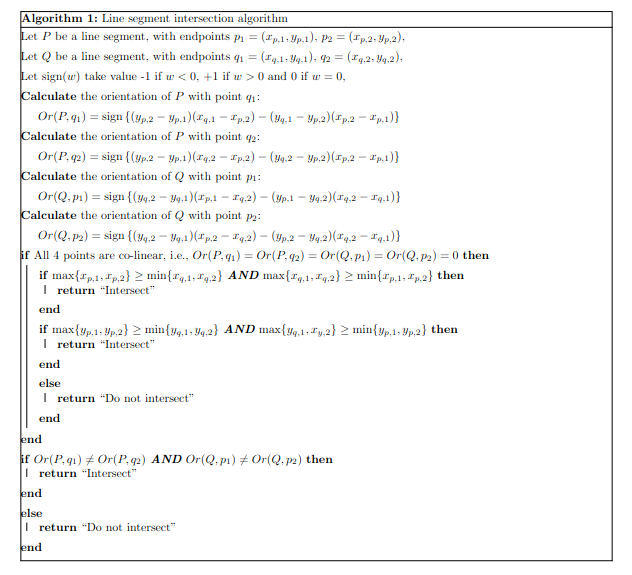

## Part 3.

Below, we see the C++ implementation of the Jarvis March algorithm for obtaining the convex hull for a set of points in a plane.

In [7]:
#include <iostream>
#include <list>
#include <cmath>
#include <vector>
#include <algorithm>
using namespace std;

In [8]:
// prior to implementing the Jarvis March algorithm
// we define preliminary functions

// obtaining the leftmost point
std::pair<double,double> find_left(std::vector<std::pair<double, double>> points){
    // initialising leftmost point
    std::pair<double,double> leftmost = points.front();
    // cycling through to find leftmost point
    for(std::pair<double,double> point : points){
        if(point.first < leftmost.first){
        leftmost = point;
        }
        if(point.first == leftmost.first){
            if(point.second < leftmost.second){
            leftmost = point;
            }
        }
    }
    return leftmost;
}

In [9]:
// testing find_left

find_left({{0,0}, {1,1}, {0,1}})

(std::pair<double, double>) { 0.0000000, 0.0000000 }


In [10]:
// function to obtain the Euclidean distance of 2 points in a pair structure

double Euc_dist(std::pair<double,double> A, std::pair<double, double> B){
    // difference in x
    double diff_x = A.first-B.first;
    // difference in y
    double diff_y = A.second-B.second;
    // pythagoras
    double dist = sqrt(pow(diff_x,2) + pow(diff_y,2));
    return dist;
}

In [11]:
// testing Euc_dist

Euc_dist({0,0}, {2,2})

(double) 2.8284271


In [12]:
// function to remove duplicates from input data

std::vector<std::pair<double,double> > remove_duplicates(std::vector<std::pair<double,double> > input){
    std::sort(input.begin(), input.end());
    input.erase(std::unique(input.begin(), input.end()), input.end());
    return input;
}

In [13]:
// Jarvis March algorithm

// taking a list of pairs as input and outputting the convex hull
std::vector<std::pair<double,double> > jarvis_march(std::vector<std::pair<double, double> > input){
    // removing duplicates from the original input data
    std::vector<std::pair<double,double> > no_duplicates = remove_duplicates(input);
    // defining the output
    std::vector<std::pair<double,double> > output;
    
    // obtaining a starting point p
    std::pair<double,double> p = find_left(no_duplicates);
    
    // constraints for the case where number of data points <= 3
    if (no_duplicates.size() < 3){
        return no_duplicates;
    }
    // for case where 3 points
    if(no_duplicates.size() == 3){
        // check if points are all co-linear
        if((no_duplicates[1].second - no_duplicates[0].second)*(no_duplicates[2].first - no_duplicates[1].first) -
          (no_duplicates[1].first - no_duplicates[0].first)*(no_duplicates[2].second - no_duplicates[1].second) == 0){
            // initialising
            std::vector<std::pair<double,double> > pair_points;
            double pair_dist = -1;
            for(int i = 0; i < 3; i++){
                for(int j = 0; j < 3; j++){
                    if(Euc_dist(no_duplicates[i], no_duplicates[j]) > pair_dist){
                        // updating
                        pair_points = {no_duplicates[i], no_duplicates[j]};
                        pair_dist = Euc_dist(no_duplicates[i], no_duplicates[j]);
                        }
                    }
                }
            // return the par with greatest Euclidean distance
            return pair_points;
            }
        else{
            // if not co-linear, output all 3 points
            return no_duplicates;
        }
    }
    
    // the main part of the jm algorithm
    
    // initialising the convex hull
    // including the leftmost point in the convex hull
    std::vector<std::pair<double,double> > ch {p};

    // iterating round the points
    while(true){   
        // initialising points q and r
        for(std::pair<double,double> q : no_duplicates){
            // initialising for use in determining orientation
            int acw = 0;
            // initialising for determining colinearity
            std::vector<std::pair<double,double> > colinear;
            std::pair<double,double> farq = p;
            
            // cycling through r
            for(std::pair<double,double> r : no_duplicates){
                if(q != p){ // q can't be p
                    if(r != p){ // r can't be p
                        if(r != q){ // r can't be q
                            //calculating cross product
                            double cp = (q.second - p.second)*(r.first - q.first)-
                                (q.first - p.first)*(r.second - q.second);
                            //orientation depends on sign    
                            if(cp <= 0){
                                acw = acw + 1;
                            }
                            // if co-linear points
                            if(cp == 0){
                                // appending to potential qs
                                colinear.push_back(q);
                                colinear.push_back(r);
                            }
                        }
                    }
                }
                // if acw for all r
                if (acw == (no_duplicates.size() - 2)){

                    // and co-linear points exist
                    if (colinear.size() != 0){
                        // initialise
                        double distance = 0;
                        // for all potential qs
                        for(std::pair<double,double> colin : colinear){
                            if(Euc_dist(p, colin) > distance){
                                // update so to find furthest q from p
                                farq = colin;
                                distance = Euc_dist(p,colin);
                            }
                        }
                        // update q to be furthest q from p
                        q = farq;
                    }
                    // append q to convex hull
                    ch.push_back(q);
                    // update p
                    p = ch.back();
                    break;
                }
            }
        }
        // break condition - if appending a point already in convex hull: stop
        if (ch.size() != remove_duplicates(ch).size()){
            // creating placeholder vector
            // this ensures order is maintained -useful if we wish to plot the convex hull
            std::vector< std::pair<double,double> > placeholder  = remove_duplicates(ch);
            // for element in convex hull
            for(std::pair<double,double> ch_element : ch){
                // if it appears in the list with no duplicates
                if(std::count(placeholder.begin(), placeholder.end(), ch_element)){
                    // and isn't already in output vector
                    if(std::count(output.begin(), output.end(), ch_element)){
                    }
                    else{
                        // append
                        output.push_back(ch_element);
                    }
                    
                }
            }
            // break out of while loop
            break;
        }   
    }
    // return vector of pairs: convex hull
    return output;
}

In [14]:
// testing jarvis march

// datasets to test on
// all of the below test datasets are previosuly tested on the python JM algorithm

// square data
std::vector<std::pair<double,double> > square_data = 
{{1,1}, {2,1}, {2,2}, {1,2}, {1.5,1.5}, {1.5,2.5}};

// line data
std::vector<std::pair<double,double> > line_data = 
{{1,1}, {2,2}, {3,3}};

// pgram data
std::vector<std::pair<double,double> > pgram_data = 
{{1,1}, {2,1}, {3,2}, {2,2}, {2,1.5}, {2.5,2.5}};

// 1 point data
std::vector<std::pair<double,double> > onepoint_data = 
{{1,1}};

// 2 point data
std::vector<std::pair<double,double> > twopoint_data = 
{{1,1},{2,2}};

// triangle
std::vector<std::pair<double,double> > triangle_data = 
{{1,1},{2,2},{1,2}};

// long line data
std::vector<std::pair<double,double> > longline_data = 
{{1,1}, {2,2}, {3,3}, {4,4}, {5,5}, {6,6}, {7,7}};

// 5 leftmost data
std::vector<std::pair<double,double> > fiveleft_data = 
{{0,7}, {2,2}, {3,3}, {7,2.2}, {3,5}, {1.5,6}, {4,1.8}, {0,8}, {0,2}, {0,5.5}, {0,6}};

// shared co-ordinate
std::vector<std::pair<double,double> > shared_data =
{{0,7}, {2,2}, {3,3}, {7,2.2}, {3,5}, {1.5,6}, {4,1.8}, {0,8}, {0,0}, {0,0}, {0,0}};

In [15]:
// all of the previous datasets were small enough to be hard-coded
// random.csv is too big for this so we use a function to read it in

#include <fstream>
#include <sstream>
#include <string>

In [16]:
template <typename T>
T lexical_cast(const std::string& str)
{
    T var;
    std::istringstream iss;
    iss.str(str);
    iss >> var;
    // deal with any error bits that may have been set on the stream
    return var;
}

template<typename data_type,
template <typename... table_type_args> typename table_type,
template <typename... row_type_args> typename row_type>
table_type<row_type<data_type> > csvtable(const std::string& filename)
{
  table_type<row_type<data_type> > table;
  std::ifstream infile(filename);
  while(infile)
    {
      std::string s;
      if(!getline(infile,s)) break;
      std::istringstream ss(s);
      row_type<data_type> row;
      while(ss)
      {
         std::string s;
         if(!getline(ss,s,',')) break;
         row.push_back(lexical_cast<data_type>(s)); 
      }
      table.push_back(row);
    }
  return table;
}

#include <list>
#include <vector>

#define readcsv csvtable<double,std::list,std::vector>

In [17]:
std::string filename {"random.csv"};
  std::list<std::vector<double> > xy_pairs {readcsv(filename)};

std::vector<std::pair<double, double> > random_data1;
double x;
double y;
for(std::vector<double>& point_i : xy_pairs){
    x = point_i[0];
    y = point_i[1];
    random_data1.push_back(std::pair<double,double>{x, y});
}

In [18]:
jarvis_march(square_data)

(std::vector<std::pair<double, double> >) { {1.0000000 , 1.0000000}, {2.0000000 , 1.0000000}, {2.0000000 , 2.0000000}, {1.5000000 , 2.5000000}, {1.0000000 , 2.0000000} }


In [19]:
jarvis_march(line_data)

(std::vector<std::pair<double, double> >) { {1.0000000 , 1.0000000}, {3.0000000 , 3.0000000} }


In [20]:
jarvis_march(pgram_data)

(std::vector<std::pair<double, double> >) { {1.0000000 , 1.0000000}, {2.0000000 , 1.0000000}, {3.0000000 , 2.0000000}, {2.5000000 , 2.5000000} }


In [21]:
jarvis_march(random_data1)

(std::vector<std::pair<double, double> >) { {-0.71657388 , 1.2021970}, {-0.60520023 , 0.95713411}, {-0.43224903 , 0.60018540}, {0.15619686 , 0.53719626}, {0.35392233 , 0.65494527}, {0.50582357 , 1.1200131}, {0.35898441 , 1.5667731}, {-0.38095175 , 1.4531055}, {-0.54529232 , 1.4050365} }


In [22]:
jarvis_march(onepoint_data)

(std::vector<std::pair<double, double> >) { {1.0000000 , 1.0000000} }


In [23]:
jarvis_march(twopoint_data)

(std::vector<std::pair<double, double> >) { {1.0000000 , 1.0000000}, {2.0000000 , 2.0000000} }


In [24]:
jarvis_march(triangle_data)

(std::vector<std::pair<double, double> >) { {1.0000000 , 1.0000000}, {1.0000000 , 2.0000000}, {2.0000000 , 2.0000000} }


In [25]:
jarvis_march(longline_data)

(std::vector<std::pair<double, double> >) { {1.0000000 , 1.0000000}, {7.0000000 , 7.0000000} }


In [26]:
jarvis_march(fiveleft_data)

(std::vector<std::pair<double, double> >) { {0.0000000 , 2.0000000}, {4.0000000 , 1.8000000}, {7.0000000 , 2.2000000}, {0.0000000 , 8.0000000} }


In [27]:
jarvis_march(shared_data)

(std::vector<std::pair<double, double> >) { {0.0000000 , 0.0000000}, {7.0000000 , 2.2000000}, {0.0000000 , 8.0000000} }


In all of the above cases we note that the output from the Jarvis March algorithm matches that of the python implementation completely. Therefore, we deduce that the above formulation in c++ is effective.

### The 5 Rs

Coding is a major part of scientific research and it is becoming more common for researchers to publish their code and make it publicly available to others. In doing so, it is best to adhere to some best practices, known as the 5 Rs - proposed by Benureau, Rougier (2018). Below, we compare the C++ implementation of the Jarvis March algorithm to that of my previous implementation in python - specifically with respect to the 5 Rs.

##### Replicate

Replicability is a difficult quality to assess. In particular, it more often pertains to the work that accompanies an algorithm. For this reason, as only the python implementation has corresponding pseudo-code, we conclude that the python implementation is more replicable. The accompanying pseudo-code is clear, explicit and easy to follow, therefore, a reader could easily replicate the algorithm in their own code. 

The python implementation is more replicable, simply due to the fact that no pseudo-code accompanied the code for the c++ implementation. The algorithm is well-known and suitably documented, therefore, we would expect a third party to be able to obtain the same results were they to replicate the solving of the problem on their own.

##### Re-run

In order for code to be re-runnable you should be able to reproduce your answers at a later point in time. The main instance when re-runnablitiy would be violated is with version differences in software, or changes to the way in which non-base functions are defined. The c++ implementation utilises libraries in order to obtain the convex hull. Whilst it is highly unlikely that the libraries will change (as they are mostly standard, widely used libraries), the python implementation uses entirely base python and therefore will only be affected potentially by version differences in python.

On paper, both implemetations are equally re-runnable, however, we could argue that as the python version uses base python it could be classed as slightly more robust in terms of re-runnability.

##### Repeat

In both the python and c++ settings, the algorithms are repeatable. There is no stochasticity in the way the algorithm obtains a convex hull, therefore, it is deterministic and will always produce the same answers when repeating the experiment The only obvious difference in the two settings is the ease with which python code can be repeated in comparison to c++. In c++ the kernel has to be re-set first which adds a layer of difficulty, however, after doing so the code re-runs and produces identical outputs, as is expected.

To summarise, setting aside programming language differences, both implementations are equally repeatable.

##### Reproduce

In order to be reproducable, we would expect the code to produce the same output, when implemented on different machines. In both cases, the code was implemented both on a virtual machine and a Windows machine, generating the same results. If the code were to be tried on different machines, the results would be the same. 

Again, due to the deterministic nature of both implementations, there is no use of pseudo-random numbers, therefore, version differences will not affect the code.

Therefore, we conclude that both implementations are equally reproducable.

##### Reuse

In both the python and c++ implementations, the code is highly re-usable. In both settings there is suitable and clear commenting - outlining each of the steps. Whilst there might be more succinct methods for carrying out the Jarvis March algorithm, in both cases, the user has a step-by-step walkthrough of the process, along with justification for certain choices. There are no hard-coded, magic numbers, again, allowing for easy reusability in different settings to the one the code was created for. 

One could argue that the C++ variant is more reusable due to the intuitive means of imputting the data - inputting a vector of the points you wish to try could be seen as more intuitive than a list of separate lists for the $x$ and $y$ co-ordinates. Finally, the python implementation utilises point classes, whilst the c++ variant keeps the datapoints as ($x,y$) co-ordinate pairs - both of which have their advantages and disadvantages in terms of interpretability.

To conclude, both variants of the algorithm are easily reusable.

## Part 4.

We aim to develop an algorithm that, given a set of points $Q$, will return the two points with the greatest Euclidean distance between them. 

Below, we present pseudo-code for a brute force method. This algorithm will try every possible combination of points before determining the two points that are furthest apart.

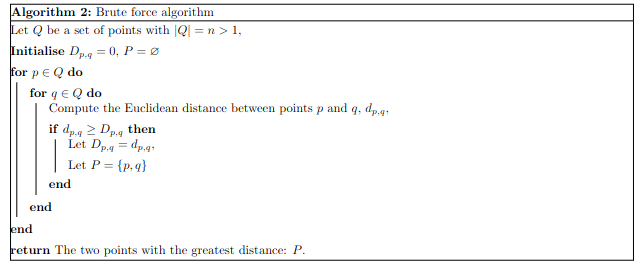

The above method is not computationally efficient as it will cycle through all points in $Q$ twice, in order to calculate the distance between all points. In doing so, it will also duplicate calculations, i.e., despite working out the distance from $p$ to $q$ it will go on to calculate the distance between $q$ and $p$. 

This algorithm has the same best and worst case computational complexities as it will always compare every point with every other point (and itself). This means the algorithm will always carry out an operation of order $\mathcal{O}(n^2)$, where $n$ is the number of points in the set $Q$.

## Part 5.

Below, we see the C++ implementation of the brute force algorithm for obtaining the two points out of a set of datapoints that are the greatest Euclidean distance from each other.

In [28]:
#include <iostream>
#include <vector>
#include <list>
#include <cmath>

In [29]:
// brute force algorithm

// we have a function that takes a list of (x,y) pairs and outputs 
// the pair with the greatest Euclidean distance along with the associated distance
std::vector<double> greatest_distance(std::vector<std::pair<double, double>> X){
    // initialising the greatest distance as -1
    double biggest_dist {-1};
    // initialising the points corresponding to the greatest distance                     
    std::pair<double,double> biggest_dist_1 {0,0};
    std::pair<double,double> biggest_dist_2 {0,0};
    // cycling through all points
    // length of vector of doubles
    int i_max = X.size();                     
    for (int i = 0; i < i_max; i++){
        for (int j = 0; j < i_max; j++){
            // co-ordinates of points
            double point_a_x = X[i].first;
            double point_a_y = X[i].second;
            double point_b_x = X[j].first;
            double point_b_y = X[j].second;
            // calculating Euclidean distance
            double Euc_dist = sqrt(pow((point_b_x - point_a_x),2) + pow((point_b_y - point_a_y),2));
            // updating if distance is greater than current largest    
            if (Euc_dist > biggest_dist){
                biggest_dist = Euc_dist;
                biggest_dist_1 = X[i];
                biggest_dist_2 = X[j];
            }
        }
    }
    std::vector<double> output = {biggest_dist_1.first, biggest_dist_1.second, biggest_dist_2.first, 
            biggest_dist_2.second, biggest_dist};
    return(output);
}

The above algorithm can be implemented using a number of test cases.

In [30]:
std::vector<double> part5_t1 = greatest_distance({{0,0},{0,1},{1,2}});
std::cout << "The points with the greatest Euclidean distance are: (" << part5_t1[0] << "," << 
part5_t1[1] << ") & (" << part5_t1[2]<< "," << part5_t1[3] << ")." << std::endl;
std::cout << "The distance between the points is: " << part5_t1[4] << std::endl;

The points with the greatest Euclidean distance are: (0,0) & (1,2).
The distance between the points is: 2.23607


(std::basic_ostream<char, std::char_traits<char> >::__ostream_type &) @0x7f348a1fd540


In [31]:
std::vector<double> part5_t2 = greatest_distance({{0,0},{0,1},{1,2}, {10000, 10000}, {-10000, 2}});
std::cout << "The points with the greatest Euclidean distance are: (" << part5_t2[0] << "," << 
part5_t2[1] << ") & (" << part5_t2[2]<< "," << part5_t2[3] << ")." << std::endl;
std::cout << "The distance between the points is: " << part5_t2[4] << std::endl;

The points with the greatest Euclidean distance are: (10000,10000) & (-10000,2).
The distance between the points is: 22359.8


(std::basic_ostream<char, std::char_traits<char> >::__ostream_type &) @0x7f348a1fd540


In [32]:
std::vector<double> part5_t3 = greatest_distance({{1,1},{1,1}});
std::cout << "The points with the greatest Euclidean distance are: (" << part5_t3[0] << "," << 
part5_t3[1] << ") & (" << part5_t3[2]<< "," << part5_t3[3] << ")." << std::endl;
std::cout << "The distance between the points is: " << part5_t3[4] << std::endl;

The points with the greatest Euclidean distance are: (1,1) & (1,1).
The distance between the points is: 0


(std::basic_ostream<char, std::char_traits<char> >::__ostream_type &) @0x7f348a1fd540


The above algorithm is by no means the most efficient method for obtaining the pair of points separated by the greatest Euclidean distance. Even if we were to consider the brute force algorithm that doesn't consider duplicate pairs i.e., distance from A to B and then B to A, we still have an algorithm of order $\mathcal{O}(n^2)$. 

In order to obtain an algorithm with the smallest computational cost we have to combine ideas from previous questions. Namely, it is obvious that the two points that are the furthest distance apart will both be on the convex hull, therefore, we can reduce the amount of data points we consider by first obtaining the convex hull, then comparing Euclidean distances. In order to obtain the convex hull, we can implement the Jarvis March algrorithm. Below we see some pseudo-code outlining the most computationally efficient method.

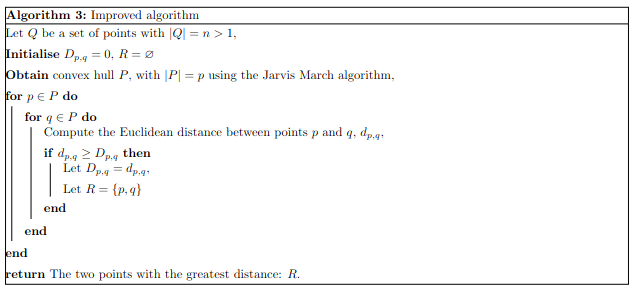

We know that the Jarvis March algorithm has an optimal computational complexity of $\mathcal{O}(np)$, where $n$ is the number of points and $p$ is the number of points in the convex hull. Using the Jarvis March algorithm, we can obtain the convex hull $P$, with $|P| = p$. Once we have this set of points we carry out the brute force algorithm on this smaller set of points - in doing so we carry out an order $\mathcal{O}(p^2)$ operation. This means that the algorithm as a whole has a computational complexity of $\mathcal{O}(np + p^2)$, which in the best case scenario (i.e., when $p << n$) will have a computational complexity lower than that of the brute force algorithm - somewhere between $\mathcal{O}(n)$ and $\mathcal{O}(n^2)$.